## Decomposition

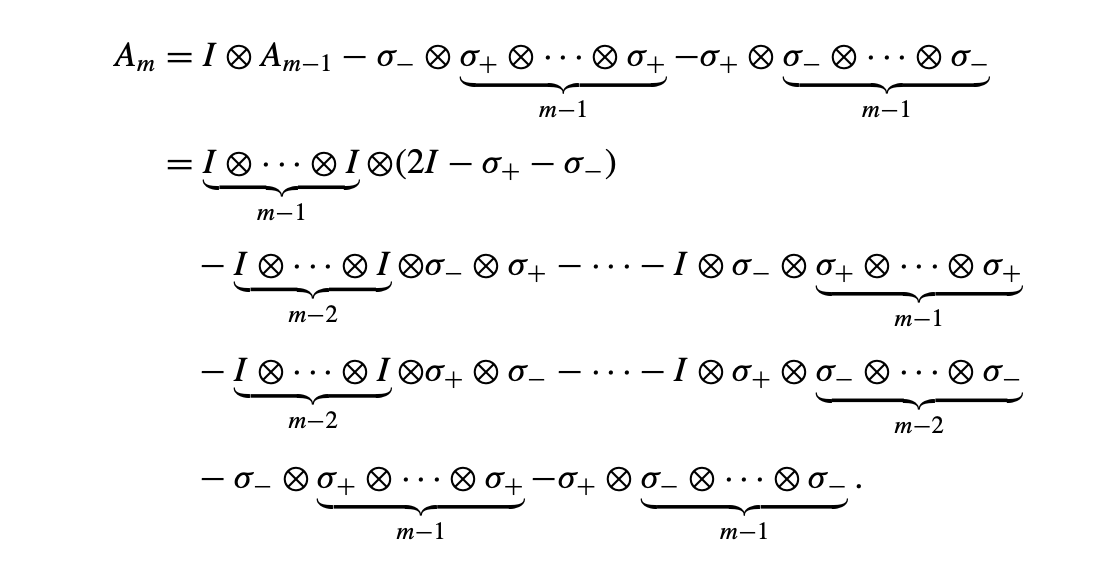

In [15]:
from Utils.decomposition import *

# Create A
A = decompose_A_matrix(8)
print("A matrix:")
print(A, '\n')

# Convert A to an operator
print("A as an operator:")
dict_to_operator(A, 8)


A matrix:
{'IIIIIIII': 2.0, 'IIIIIII+': -1.0, 'IIIIIII-': -1.0, '-+++++++': -1.0, '+-------': -1.0, 'I-++++++': -1.0, 'I+------': -1.0, 'II-+++++': -1.0, 'II+-----': -1.0, 'III-++++': -1.0, 'III+----': -1.0, 'IIII-+++': -1.0, 'IIII+---': -1.0, 'IIIII-++': -1.0, 'IIIII+--': -1.0, 'IIIIII-+': -1.0, 'IIIIII+-': -1.0} 

A as an operator:
Operator([[ 2.+0.j, -1.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          [-1.+0.j,  2.+0.j, -1.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  2.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          ...,
          [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  2.+0.j, -1.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, ..., -1.+0.j,  2.+0.j, -1.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j, -1.+0.j,  2.+0.j]],
         input_dims=(2, 2, 2, 2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2, 2, 2, 2))


### B matrix

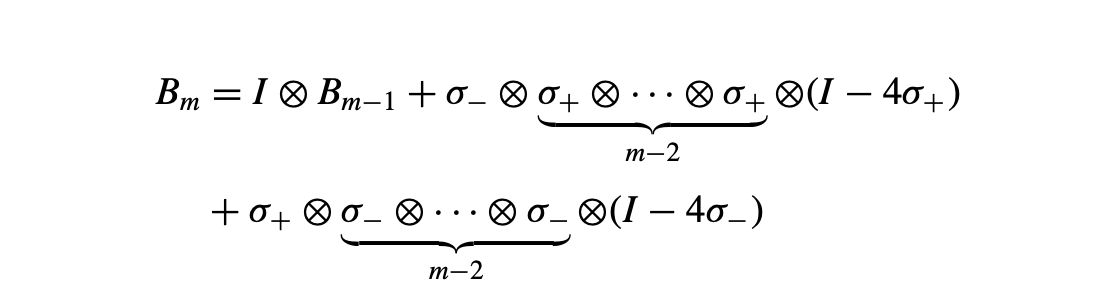

In [2]:
# Create B
B = decompose_B_matrix(3)
print("B matrix:")
print(B, '\n')
# Convert B to an operator
print("B as an operator:")
dict_to_operator(B, 3)

B matrix:
{'III': 6.0, 'II+': -4.0, 'II-': -4.0, 'I-I': 1.0, 'I-+': -4.0, 'I+I': 1.0, 'I+-': -4.0, '-+I': 1.0, '-++': -4.0, '+-I': 1.0, '+--': -4.0} 

B as an operator:
Operator([[ 6.+0.j, -4.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [-4.+0.j,  6.+0.j, -4.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 1.+0.j, -4.+0.j,  6.+0.j, -4.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  1.+0.j, -4.+0.j,  6.+0.j, -4.+0.j,  1.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j, -4.+0.j,  6.+0.j, -4.+0.j,  1.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j, -4.+0.j,  6.+0.j, -4.+0.j,
            1.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j, -4.+0.j,  6.+0.j,
           -4.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j, -4.+0.j,
            6.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


### C matrix

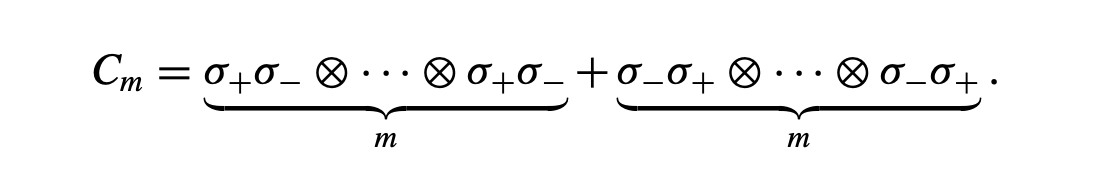

In [3]:
# Create C
C = decompose_C_matrix(3)
print("C matrix:")
print(C, '\n')
# Convert C to an operator
print("C as an operator:")
dict_to_operator(C, 3)

C matrix:
{'000': 1.0, '111': 1.0} 

C as an operator:
Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


# b state

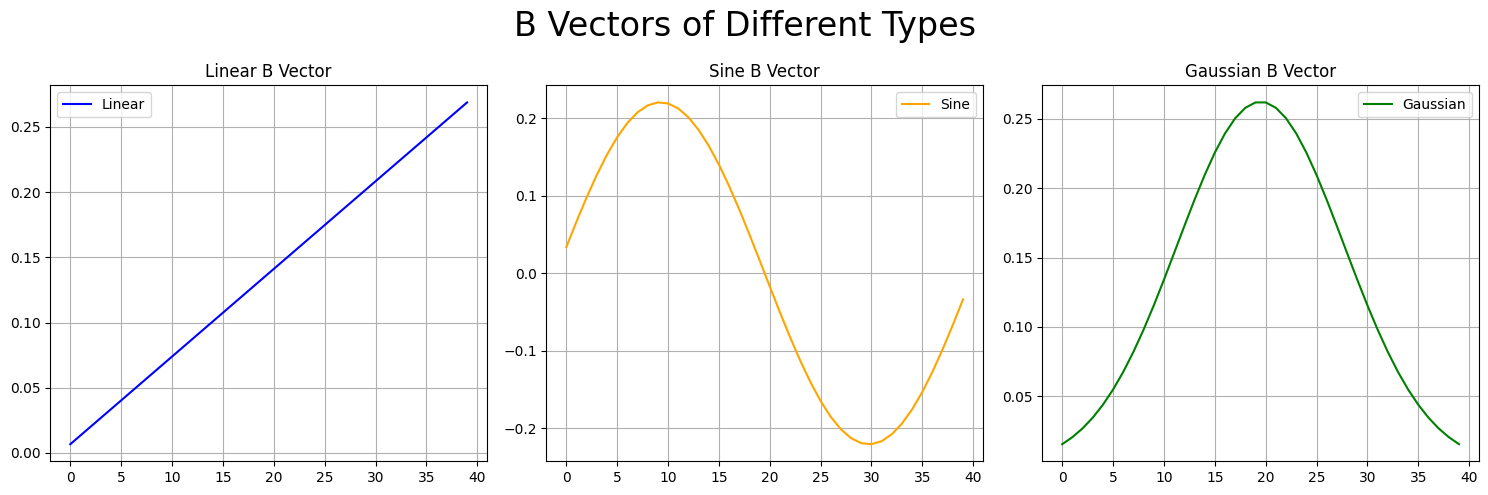

In [4]:
from Utils.create_b_state import *
import matplotlib.pyplot as plt

# Create b vectors Of different types
b = create_b_vector_gaussian(40)
b1 = create_b_vector_linear(40)
b2 = create_b_vector_sine(40)

stateV = get_b_statevector(5)

#print("state vector (first 10 elements):", stateV[1])

plt.figure(figsize=(15, 5))
plt.suptitle('B Vectors of Different Types', fontsize=24)

plt.subplot(1, 3, 1)
plt.plot(b1, label='Linear', color='blue')
plt.title('Linear B Vector')
plt.grid()
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(b2, label='Sine', color='orange')
plt.title('Sine B Vector')
plt.grid()
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(b, label='Gaussian', color='green')
plt.title('Gaussian B Vector')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


# Ansatz

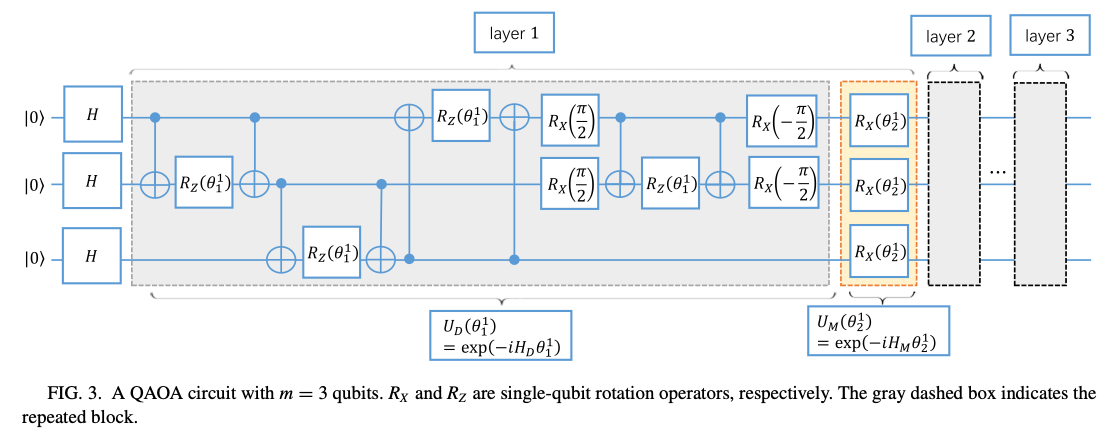

num of parameters : 2 = 2 * 1


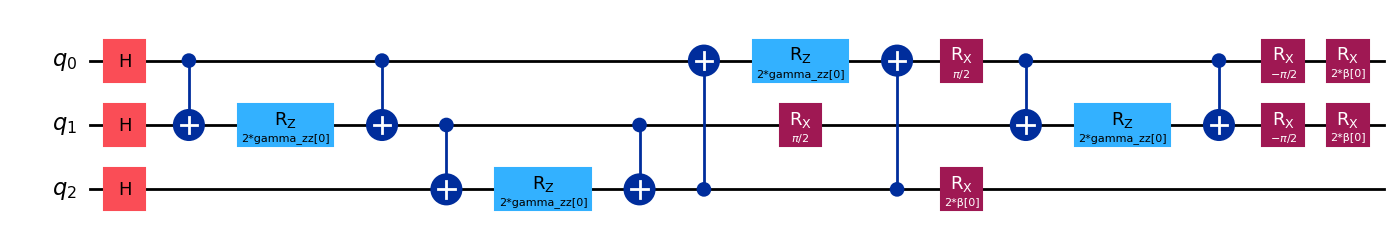

In [6]:
from Utils.Ansatz import create_qaoa_ansatz as create_ansatz
L = 1
ansatz = create_ansatz(3, L)
print("num of parameters :", ansatz.num_parameters, '= 2 * {}'.format(L))
ansatz.draw('mpl')

# VQE Solver

### Make O operator

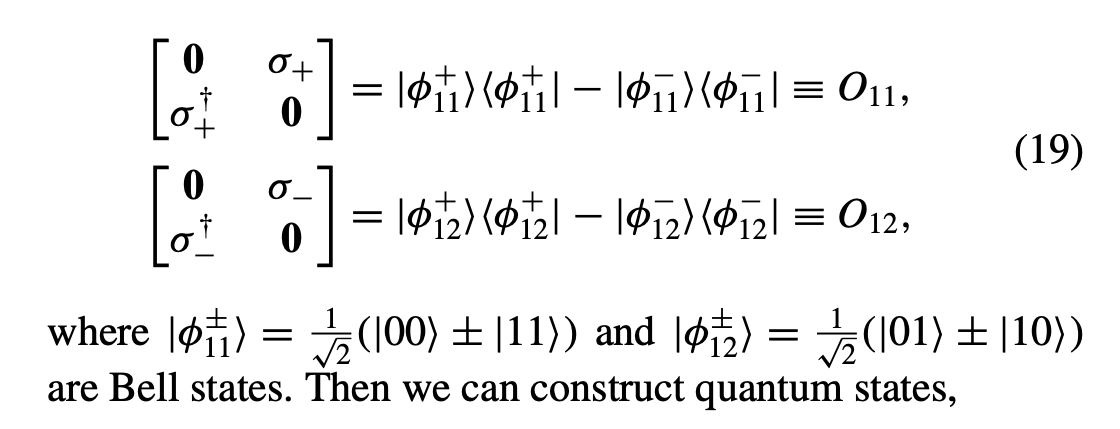

Creating operators to apply to the Total Ansatz made by adding auxiliary qubits to the Ansatz

In [7]:
from Utils.To_Hermite_Operator import get_hermitian_observable

get_hermitian_observable('II++')  # 예시 호출

SparsePauliOp(['XIIXX', 'XIIYY', 'YIIXY', 'YIIYX'],
              coeffs=[ 0.25+0.j, -0.25+0.j,  0.25+0.j,  0.25+0.j])

### B state

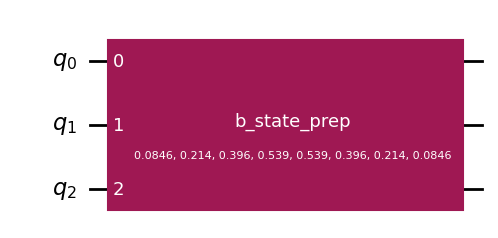

In [8]:
from Utils.create_b_state import get_b_statevector

# Get the state vector for b
b = get_b_statevector(3) # gaussian b vector

# Draw the b state on circuit
b[0].draw('mpl') 

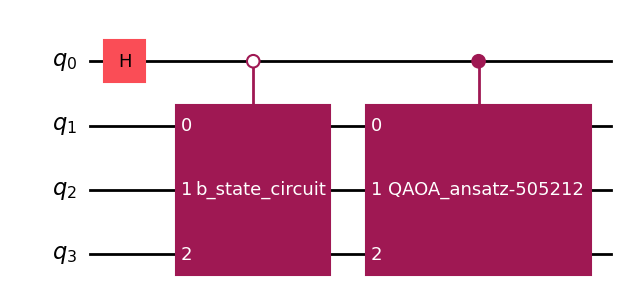

In [9]:
# -*- coding: utf-8 -*-
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.primitives import StatevectorEstimator as Estimator  # Aer 대신 기본 Estimator 사용
from qiskit.circuit.library import RYGate
from Utils.create_b_state import get_b_statevector
from Utils.Ansatz import create_qaoa_ansatz as create_ansatz
from Utils.b_psi_expect import calculate_b_psi_from_dict, create_real_b_psi_circuit, create_imag_b_psi_circuit


ansatz = create_ansatz(3, 1)  # 예시로 3개의 큐빗과 1개의 레이어를 갖는 QAOA 안사츠 생성 -> 파라미터는 2개
b_state = get_b_statevector(3)[0]  # 예시로 3개의 큐빗에 대한 |b⟩ 상태 벡터를 가져옴

# calculate expectation value of real(⟨b|H|ψ⟩)
ans = create_real_b_psi_circuit(
    b_circuit= b_state,
    psi_ansatz=ansatz,
    theta_value= [0.1, 0.2]
    )

ans.draw('mpl')

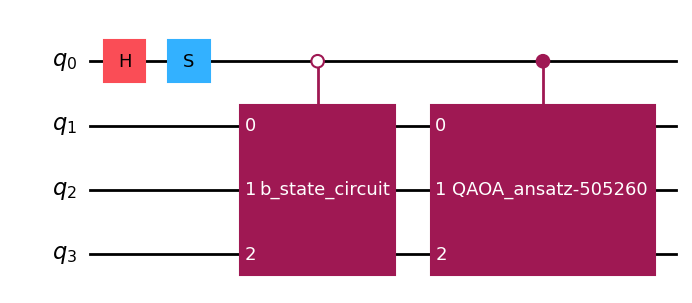

In [10]:
# calculate expectation value of imag(⟨b|H|ψ⟩)
ans1 = create_imag_b_psi_circuit(
    b_circuit= b_state,
    psi_ansatz=ansatz,
    theta_value= [0.1, 0.2]
    )

ans1.draw('mpl')


Select the function to generate vector b:
  1: Gaussian
  2: Sine
  3: Uniform
  4: Random
  5: Linear

Select the VQE solver to use:
  1: Statevector Solver (fast, exact simulation)
  2: Estimator Primitive (slower, simulates backend execution)
  3: paper-style cost: <psi|B|psi>-<psi|C|psi>-|<b|A|psi>|^2

VQE 최적화 시작 (파라미터 수: 4)...
Iteration  123: Cost = -3.43174118
최적화 완료.

VQE Final Results (4-qubit, 2-layer, b-func: Gaussian, Solver: Paper-style Cost Solver)
▷ Minimum Cost (Functional Value): -3.43174144
▷ Fidelity with classical solution: 0.00406580  (Ideal = 1.0)


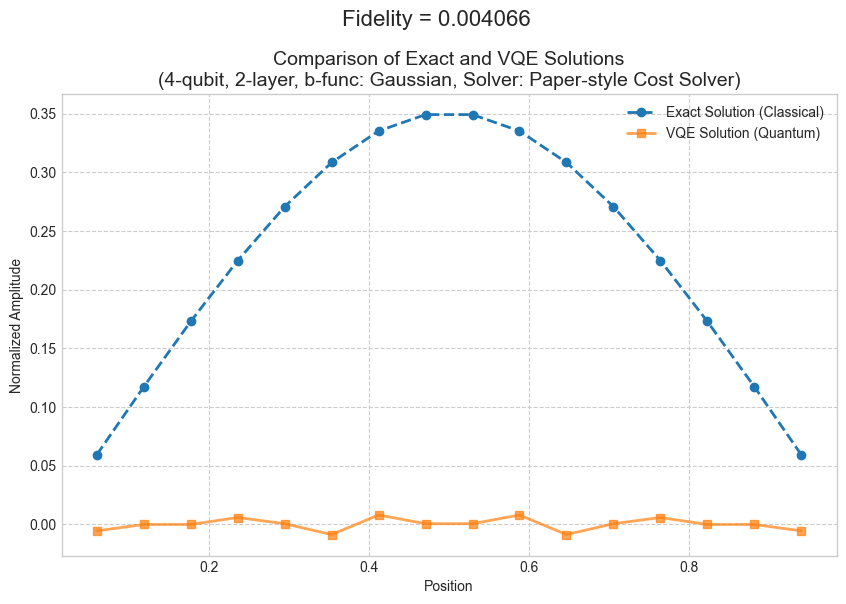

In [19]:
%run main.py

Starting VQE Fidelity vs. Layers Analysis
Qubit Counts to Test: [2, 3, 4]
Layer Counts to Test: [1, 2, 3]

[INFO] Running simulations for 2 qubits...

VQE 최적화 시작 (파라미터 수: 2)...
Iteration  102: Cost = -3.43942417
최적화 완료.
  -> 2 Qubits, 1 Layers: Fidelity = 0.036025 (took 5.70 s)

VQE 최적화 시작 (파라미터 수: 4)...
Iteration   46: Cost = -3.43942453
최적화 완료.
  -> 2 Qubits, 2 Layers: Fidelity = 0.036003 (took 2.98 s)

VQE 최적화 시작 (파라미터 수: 6)...
Iteration   61: Cost = -3.43942442
최적화 완료.
  -> 2 Qubits, 3 Layers: Fidelity = 0.036016 (took 4.62 s)

[INFO] Running simulations for 3 qubits...

VQE 최적화 시작 (파라미터 수: 2)...
Iteration  178: Cost = -1.56452415
최적화 완료.
  -> 3 Qubits, 1 Layers: Fidelity = 0.847688 (took 18.24 s)

VQE 최적화 시작 (파라미터 수: 4)...
Iteration  180: Cost = -1.59069357
최적화 완료.
  -> 3 Qubits, 2 Layers: Fidelity = 0.855528 (took 22.93 s)

VQE 최적화 시작 (파라미터 수: 6)...
Iteration  166: Cost = -1.59069424
최적화 완료.
  -> 3 Qubits, 3 Layers: Fidelity = 0.855391 (took 24.49 s)

[INFO] Running simulations f

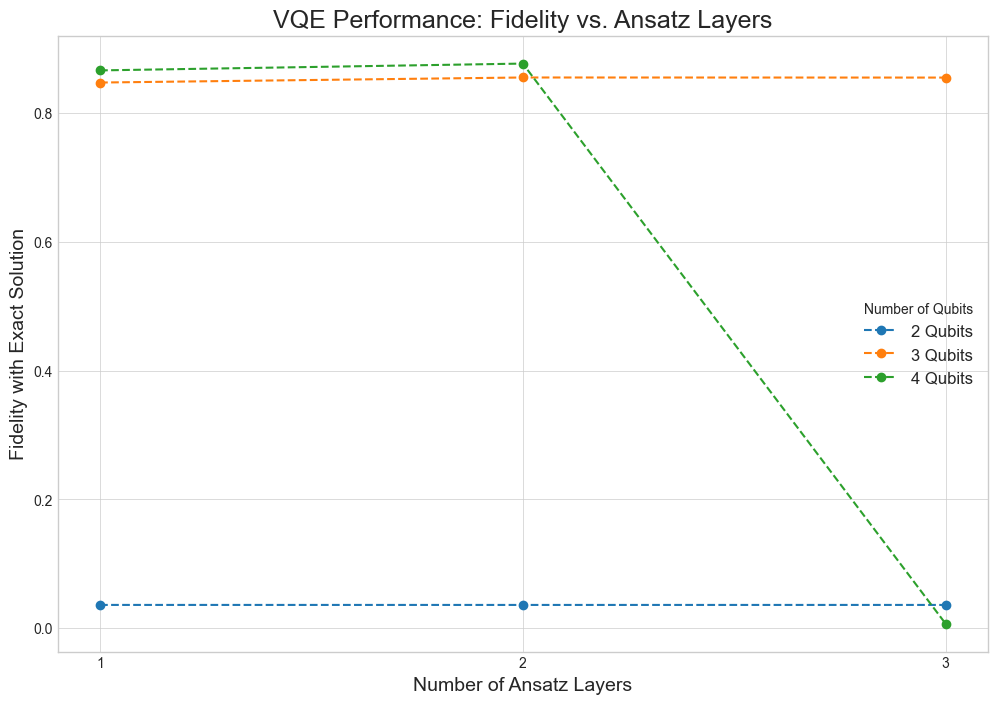

In [18]:
%run ./Experiments/analysis_plotter.py